<a href="https://colab.research.google.com/github/JamshidbekYusupov/Linear-Algebra-/blob/main/Advanced_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv("/content/uy (1).csv")
df.head()

,maydon,yotoqxona,yili,xususiyat_4,shovqin,narx
0,37.454012,32.101582,2.062477,80.278882,0.853497,138918.065017
1,95.071431,4.206998,18.051058,51.985348,9.968743,92251.539616
2,73.199394,8.081436,10.105047,52.227417,5.021950,83703.803705
3,59.865848,44.927709,16.529149,114.612131,5.953850,202104.827482
4,15.601864,30.321453,6.400992,65.675591,0.670765,123990.945023


In [3]:
### In order to view some multiculinarity we should add new columns in order not to make a perfect multiculinarty.

df['feature_5'] = 0.8 * df['maydon'] + 0.2*df['yotoqxona'] + np.random.normal(0, 0.1, len(df))
df['feature_6'] = np.random.rand(len(df))
df['feature_7'] = df['feature_5'] + 0.2 * df['maydon'] + np.random.normal(0, 0.1, len(df))
df['feature_8'] = np.random.rand(len(df)) * 10

In [4]:
df.head()

,maydon,yotoqxona,yili,xususiyat_4,shovqin,narx,feature_5,feature_6,feature_7,feature_8
0,37.454012,32.101582,2.062477,80.278882,0.853497,138918.065017,36.378379,0.439125,43.887893,6.576825
1,95.071431,4.206998,18.051058,51.985348,9.968743,92251.539616,76.753353,0.636300,95.746540,8.177115
2,73.199394,8.081436,10.105047,52.227417,5.021950,83703.803705,60.343325,0.408221,74.986577,0.535844
3,59.865848,44.927709,16.529149,114.612131,5.953850,202104.827482,56.770071,0.542523,68.877730,0.644877
4,15.601864,30.321453,6.400992,65.675591,0.670765,123990.945023,18.583122,0.270895,21.664815,9.756714


In [6]:
### Normilizing x and y

x = df.drop(columns= ['narx'])
y = df['narx']

x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

x_scaled = x_scaler.fit_transform(x)
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1)).flatten()


In [8]:
#### Splitting the date into train and test sets to train and test the model

X_train, X_test,  y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.25, random_state=42)

In [9]:
class LinearRegression:
  def __init__(self, num_features, alpha = 0.0001, num_iterations = 1000):
    self.alpha= alpha
    self.num_iterations = num_iterations
    self.m = np.zeros(num_features)
    self.b = 0.0

  def fit(self, X, y):

    N = len(X)
    for i in range(self.num_iterations):
      y_hat = self.b + np.dot(X, self.m)
      error = y_hat - y
      dm = (1/N) * np.dot(X.T, error)
      db = (1/N) * np.sum(error)

      self.b -= self.alpha * db
      self.m -= self.alpha * dm

      if i % 100 == 0:
        cost = (1 / (2*N)) * np.sum(error **2)
        print(f"Cost:{cost:.03f}, i:{i}, b:{self.b:.03f}, m:{self.m}")

  def predict(self, X):
      return self.b + np.dot(X, self.m)

In [43]:
lin_reg = LinearRegression(x.shape[1], alpha=0.0001, num_iterations=50000)
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {lin_mse:.05f}")

Cost:0.169, i:0, b:0.000, m:[2.90229917e-05 3.26823703e-05 2.65413321e-05 3.56185634e-05
 2.42333297e-05 3.06710613e-05 2.52573160e-05 3.04002444e-05
 2.62065059e-05]
Cost:0.159, i:100, b:0.005, m:[0.00288188 0.00325263 0.00263162 0.00354206 0.00240455 0.00304642
 0.00250555 0.00301937 0.00260077]
Cost:0.149, i:200, b:0.010, m:[0.00563904 0.0063791  0.00514174 0.00694123 0.00470161 0.00596276
 0.00489788 0.00590951 0.00508611]
Cost:0.141, i:300, b:0.015, m:[0.00830368 0.0094152  0.00756011 0.01023669 0.00691819 0.00878301
 0.0072052  0.00870413 0.00748523]
Cost:0.132, i:400, b:0.020, m:[0.01087892 0.01236393 0.0098898  0.0134319  0.009057   0.01151037
 0.00943036 0.0114064  0.009801  ]
Cost:0.125, i:500, b:0.024, m:[0.01336772 0.0152282  0.01213378 0.01653021 0.01112064 0.01414795
 0.01157612 0.01401942 0.01203623]
Cost:0.117, i:600, b:0.029, m:[0.01577298 0.01801081 0.01429495 0.01953483 0.01311163 0.01669874
 0.01364514 0.01654617 0.01419361]
Cost:0.111, i:700, b:0.033, m:[0.0180975 

In [40]:
### This is the class that shows how Lasso Regression works.

class LassoRegression:

  def __init__(self, num_features, alpha = 0.0001, num_itterations = 5000, lambda_ = 1.0):


    self.alpha = alpha
    self.num_itterations = num_itterations
    self.lambda_ = lambda_
    self.b = 0.0
    self.m = np.zeros(num_features)

  def fit(self, X, y):
    N = len(X)

    for i in range(self.num_itterations):
      y_hat = self.b + np.dot(X, self.m)
      error = y_hat - y

      dm = (1/N) * np.dot(X.T, error) + self.lambda_ * np.sign(self.m)
      db = (1/N) * np.sum(error)

      self.b -= self.alpha * db
      self.m -= self.alpha * dm

      if i % 100 == 0:
        cost = (1 / (2*N)) * np.sum(error ** 2) + self.lambda_ * np.sum(np.abs(self.m))
        print(f"Cost:{cost:.03f}, i:{i}, b:{self.b:.03f}, m:{self.m}")

  def predict(self, X):
      return self.b + np.dot(X, self.m)

In [44]:
### Fitting and predicting process with lasso

lasso_reg = LassoRegression(x.shape[1], alpha=0.0001, num_itterations=50000)
lasso_reg.fit(X_train, y_train)
y_pred = lasso_reg.predict(X_test)
lasso_mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {lasso_mse:.05f}")

Cost:0.169, i:0, b:0.000, m:[2.90229917e-05 3.26823703e-05 2.65413321e-05 3.56185634e-05
 2.42333297e-05 3.06710613e-05 2.52573160e-05 3.04002444e-05
 2.62065059e-05]
Cost:0.167, i:100, b:0.005, m:[ 1.17609002e-04  8.71235136e-05  6.60196769e-05 -1.82523129e-05
  3.48977674e-05  8.35066063e-05 -6.26380320e-05  5.62472759e-05
  3.32426940e-05]
Cost:0.164, i:200, b:0.011, m:[-1.94353737e-05  1.15732145e-04  7.79634002e-05  9.84390072e-05
  2.17947758e-05  1.09667145e-04  2.38561263e-05  5.55946080e-05
  1.47243073e-05]
Cost:0.161, i:300, b:0.016, m:[ 1.81720409e-05  1.18777776e-04  6.26603321e-05 -1.39950834e-05
 -1.48296715e-05  1.09444878e-04  8.50012700e-05  2.87328463e-05
 -2.90823207e-05]
Cost:0.159, i:400, b:0.021, m:[ 3.06828490e-05  9.65215880e-05  2.03891712e-05  4.47404095e-05
 -7.47350709e-05  8.31024021e-05  1.21064814e-04 -2.40773048e-05
  1.02081926e-04]
Cost:0.156, i:500, b:0.026, m:[ 1.83524246e-05  4.92225573e-05 -4.85737775e-05  7.49399945e-05
  4.23150018e-05  3.090569

In [45]:
### This is the class that shows how Ridge Regression works.

class RidgeRegression:

  def __init__(self, num_features, alpha = 0.0001, num_itterations = 5000, lambda_ = 1.0):
    self.alpha = alpha
    self.num_itterations = num_itterations
    self.lambda_ = lambda_
    self.b = 0.0
    self.m = np.zeros(num_features)

  def fit(self, X, y):
    N = len(X)

    for i in range(self.num_itterations):
      y_hat = self.b + np.dot(X, self.m)
      error = y_hat - y

      dm = (1/N) * np.dot(X.T, error) + 2 * self.lambda_ * self.m
      db = (1/N) * np.sum(error)

      self.b -= self.alpha * db
      self.m -= self.alpha * dm

      if i % 100 == 0:
        cost = (1 / (2*N)) * np.sum(error **2) + self.lambda_ * np.sum(self.m ** 2)
        print(f"Cost:{cost:.03f}, i:{i}, b:{self.b:.03f}, m:{self.m}")

  def predict(self, X):
      return self.b + np.dot(X, self.m)

In [46]:
### Fitting and predicting process with Ridge

ridge_reg = RidgeRegression(x.shape[1], alpha=0.0001, num_itterations=50000)
ridge_reg.fit(X_train, y_train)
y_pred = ridge_reg.predict(X_test)
ridge_mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {ridge_mse:.05f}")

Cost:0.169, i:0, b:0.000, m:[2.90229917e-05 3.26823703e-05 2.65413321e-05 3.56185634e-05
 2.42333297e-05 3.06710613e-05 2.52573160e-05 3.04002444e-05
 2.62065059e-05]
Cost:0.159, i:100, b:0.005, m:[0.00285332 0.00322039 0.00260554 0.00350695 0.00238072 0.00301623
 0.00248071 0.00298945 0.00257499]
Cost:0.150, i:200, b:0.010, m:[0.00552832 0.00625374 0.00504078 0.00680486 0.00460928 0.00584567
 0.00480168 0.00579347 0.00498622]
Cost:0.142, i:300, b:0.015, m:[0.00806139 0.00914011 0.00733949 0.00993772 0.00671627 0.00852669
 0.00699488 0.00845012 0.00726673]
Cost:0.134, i:400, b:0.020, m:[0.01045958 0.01188648 0.00950854 0.01291351 0.00870777 0.0110666
 0.00906668 0.01096666 0.00942303]
Cost:0.127, i:500, b:0.024, m:[0.01272957 0.01449954 0.01155445 0.01573983 0.01058952 0.01347236
 0.01102316 0.01335001 0.01146128]
Cost:0.121, i:600, b:0.029, m:[0.01487771 0.01698562 0.01348343 0.01842388 0.01236702 0.0157506
 0.01287008 0.01560675 0.01338736]
Cost:0.116, i:700, b:0.033, m:[0.01691005 0

In [34]:
### This is the class that shows how Elastic Regression works.

class ElasticRegression:

  def __init__(self, num_features, alpha = 0.0001, num_itterations = 5000, lambda_1 = 1.0, lambda_2 = 1.0):
    self.alpha = alpha
    self.num_itterations = num_itterations
    self.lambda_1 = lambda_1
    self.lambda_2 = lambda_2
    self.b = 0.0
    self.m = np.zeros(num_features)

  def fit(self, X, y):
    N = len(X)

    for i in range(self.num_itterations):
      y_hat = self.b + np.dot(X, self.m)
      error = y_hat - y

      dm = (1/N) * np.dot(X.T, error) + 2 * self.lambda_2 * self.m + self.lambda_1 * np.sign(self.m)
      db = (1/N) * np.sum(error)

      self.b -= self.alpha * db
      self.m -= self.alpha * dm

      if i % 100 == 0:
        cost = (1 / (2*N)) * np.sum(error **2) + self.lambda_1 * np.sum(self.m) + self.lambda_2 * np.sum(self.m ** 2)
        print(f"Cost:{cost:.03f}, i:{i}, b:{self.b:.03f}, m:{self.m}")

  def predict(self, X):
      return self.b + np.dot(X, self.m)

In [48]:
elastic_reg = ElasticRegression(x.shape[1], alpha=0.0001, num_itterations=50000, lambda_1=0.5, lambda_2=0.5)
elastic_reg.fit(X_train, y_train)
y_pred = elastic_reg.predict(X_test)
elastic_mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {elastic_mse:.05f}")

Cost:0.169, i:0, b:0.000, m:[2.90229917e-05 3.26823703e-05 2.65413321e-05 3.56185634e-05
 2.42333297e-05 3.06710613e-05 2.52573160e-05 3.04002444e-05
 2.62065059e-05]
Cost:0.166, i:100, b:0.005, m:[ 1.73012629e-05 -1.32187766e-05  6.57493255e-05  8.13859350e-05
  3.46297292e-05 -1.68218840e-05  3.71389735e-05  5.59152990e-05
  3.29804961e-05]
Cost:0.163, i:200, b:0.011, m:[-2.00283616e-05  1.50467693e-05 -2.26005221e-05 -2.29156702e-06
  2.12958555e-05  9.03522464e-06  2.34107525e-05  5.48752438e-05
  1.41803011e-05]
Cost:0.161, i:300, b:0.016, m:[ 1.72941427e-05  1.77691806e-05  6.18609420e-05 -1.50767382e-05
 -1.55561347e-05  8.50410284e-06 -1.57086360e-05  2.77081920e-05
  7.01220460e-05]
Cost:0.158, i:400, b:0.021, m:[ 2.95403955e-05 -4.77425806e-06  1.93352394e-05  4.33487625e-05
  2.43169852e-05 -1.81027297e-05  2.01390195e-05  7.46326945e-05
  1.02045116e-06]
Cost:0.156, i:500, b:0.026, m:[ 1.69604431e-05  4.76427400e-05  5.01085357e-05  7.32301615e-05
  4.11566790e-05  2.942503

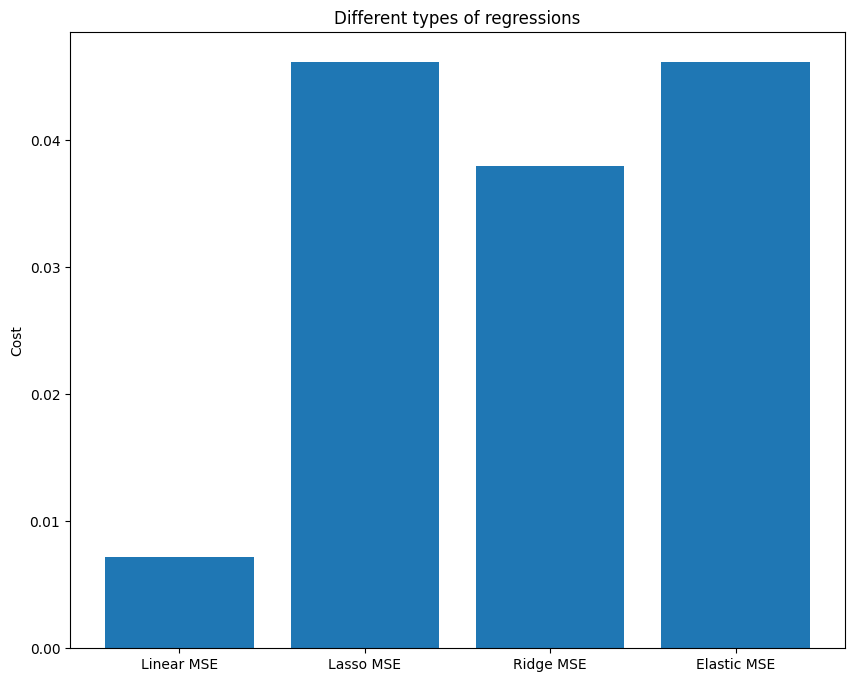

In [50]:
#### Visualisation of different types of Regressions

plt.figure(figsize=(10, 8))
plt.bar(['Linear MSE', 'Lasso MSE', 'Ridge MSE', 'Elastic MSE'], [lin_mse, lasso_mse, ridge_mse, elastic_mse])
plt.title("Different types of regressions")
plt.ylabel("Cost")
plt.show()

Accorind to the graphics, our multiple linear model for this datset is
working better then Ridge, Lasso and Elastic Regressions.